In [1]:
import os
import glob
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import spearmanr #Loocv

import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
sys.path.append('../Clustering/custom_function/')
import clustering

In [3]:
def cluster_rdm(cluster_results_region,cluster_model='cl_k3'):
    dissim_cluster_result = pd.DataFrame(index = cluster_results_region.index,
                                         columns = cluster_results_region.index)
    for i in dissim_cluster_result.index:
        for j in dissim_cluster_result.columns:
            # cluster result was in the last column
            if cluster_results_region.loc[i,cluster_model] == cluster_results_region.loc[j,cluster_model]:
                dissim_cluster_result.loc[i,j] = 0
            else:
                dissim_cluster_result.loc[i,j] = 1
            dissim_cluster_result = dissim_cluster_result.astype(float)
            
    return(dissim_cluster_result)

In [4]:
relationships = pd.read_csv('../DataCleanPCA/input_data/RelDim_labels/159relationships_fix_label.csv',
                           index_col=0)
relationships = relationships['0'].to_list()

dim_rel_scaled_total = pd.read_csv('../DataCleanPCA/input_data/Nations/Total/output_data/Total_scale_var_33v.csv',index_col=0)
dim_rel_scaled_total.index = relationships
pca_5c_33d_scores_total = pd.read_csv('output_data/pca_results/Total_scores_var_5c_33d.csv',index_col=0) 
pca_5c_33d_scores_total.columns = ['Activeness','Exchange','Formality','Equality','Valence']
pca_5c_33d_scores_total.index = relationships
# the three dimensions are reversed
pca_5c_33d_scores_total['Activeness'] = -pca_5c_33d_scores_total['Activeness']
pca_5c_33d_scores_total['Formality'] = -pca_5c_33d_scores_total['Formality']
pca_5c_33d_scores_total['Valence'] = -pca_5c_33d_scores_total['Valence']

# HPP

Text(0, 0.5, 'Silhouette Value')

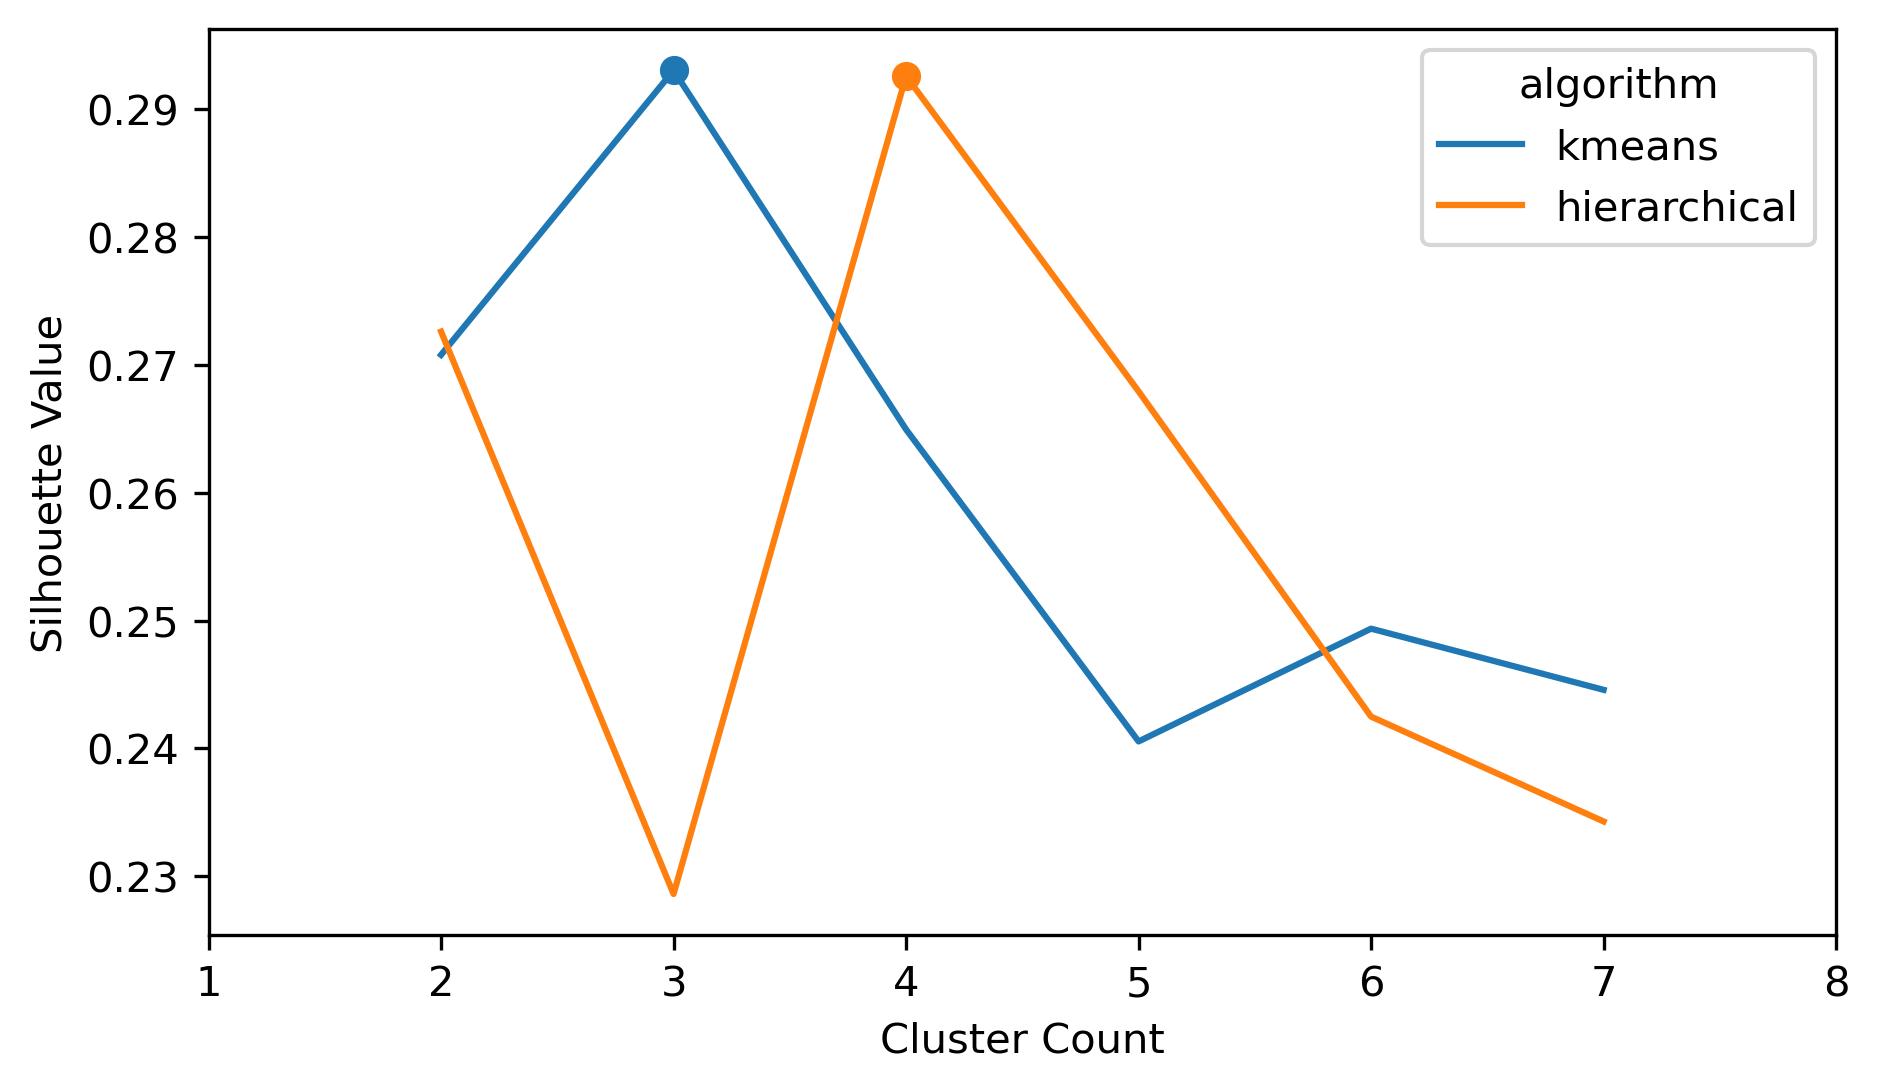

In [5]:
silhouette_result_df = clustering.optimalK_grouped(data_type='df', data=dim_rel_scaled_total, 
                            algorithm1='kmeans', algorithm2='hierarchical', 
                            title='', random_state=2022, maxClusters=8)
# Plot the silhouette scores for each algorithm
plt.figure(figsize=(7,4),dpi=300)
plt.xlim(1,8)
sns.lineplot(data=silhouette_result_df, x="clusterCount", y="silhouette", hue="algorithm")

algorithm1_df = silhouette_result_df[silhouette_result_df['algorithm']=='kmeans']
algorithm2_df = silhouette_result_df[silhouette_result_df['algorithm']=='hierarchical']
plt.scatter(algorithm1_df.loc[algorithm1_df['silhouette'].idxmax(),'clusterCount'], 
                algorithm1_df['silhouette'].max())
plt.scatter(algorithm2_df.loc[algorithm2_df['silhouette'].idxmax(),'clusterCount'], 
                algorithm2_df['silhouette'].max())
plt.xlabel('Cluster Count')
plt.ylabel('Silhouette Value')

In [6]:
raw_results = clustering.create_cluster_models(data_type = "df",data = dim_rel_scaled_total,
                        methods=['KMeans'],ks=[2,3],keep_orig=True)

raw_results.to_csv('output_data/categorical_model/total_raw33d_dissim_3k.csv')

for n in range(len(raw_results['cl_k3'].unique())):
    each_cluster = raw_results.index[raw_results['cl_k3']==n]
    print("\nCluster "+str(n+1)+" Relationship:{}".format(len(each_cluster)))
    print(*raw_results.index[raw_results['cl_k3']==n], sep = ", ")


Cluster 1 Relationship:55
Parent and Child, Parent and Teenager, Wife and Husband, Fiance and Fiancee, Between Siblings, Between cousins, Between Close Friends, Between second cousins, Parent and Infant, Grandparent and Grandchild, Step-parent and Step-child, Foster-parent and Foster-child, Godparent and Godchild, Step-grandparent and Step-grandchild, Ancestor and Descendant, Bride and Groom, Man and His Mistress, Brother and Sister, Between step-siblings, Between close relatives, Between twins, Between a person and their family friends, Between a person and their deceased spouse, Between religious followers, Man and God, Between peers, Between classmates, Between roommates, Between sorority sisters, Between fraternity brothers, Bride and Bridesmaid, Groom and Groomsman, Between friends, Between Facebook Friends, Between childhood friends, Between pen-friends, Between friends with benefits, Between romantic lovers, Between life-partners, Between soul-mates, Between church members, Bet

In [7]:
for n in range(len(raw_results['cl_k2'].unique())):
    each_cluster = raw_results.index[raw_results['cl_k2']==n]
    print("\nCluster "+str(n+1)+" Relationship:{}".format(len(each_cluster)))
    print(*raw_results.index[raw_results['cl_k2']==n], sep = ", ")


Cluster 1 Relationship:64
Parent and Child, Parent and Teenager, Wife and Husband, Fiance and Fiancee, Between Siblings, Between cousins, Therapist and Patient, Teacher and Student, Between Close Friends, Between teammates in sports, Between second cousins, Parent and Infant, Grandparent and Grandchild, Step-parent and Step-child, Foster-parent and Foster-child, Godparent and Godchild, Step-grandparent and Step-grandchild, Ancestor and Descendant, Bride and Groom, Man and His Mistress, Brother and Sister, Between step-siblings, Between close relatives, Between twins, Between a person and their family friends, Between a person and their deceased spouse, Doctor and Nurse, Patient and Caretaker, Coach and athlete, Team Captain and Team Members, Babysitter and Infant, Between religious followers, Psychologist and Client, Man and God, Between peers, Between classmates, Between roommates, Between sorority sisters, Between fraternity brothers, Bride and Bridesmaid, Groom and Groomsman, Guest

In [8]:
raw_results = clustering.create_cluster_models(data_type = "df",data = dim_rel_scaled_total,
                        methods=['Hierarchical'],ks=[2,3],keep_orig=True)
for n in range(len(raw_results['cl_h3'].unique())):
    each_cluster = raw_results.index[raw_results['cl_h3']==n]
    print("\nCluster "+str(n+1)+" Relationship:{}".format(len(each_cluster)))
    print(*raw_results.index[raw_results['cl_h3']==n], sep = ", ")


Cluster 1 Relationship:129
Parent and Child, Parent and Teenager, Wife and Husband, Fiance and Fiancee, Between Siblings, Between a person and their in-laws, Between cousins, Employer and Employee, Interviewer and Job applicant, Nurse and Patient, Therapist and Patient, Salesperson and Customer, Between Business Partners, Teacher and Student, Professor and Graduate student, Master and Servant, Between Close Friends, Between casual acquaintances, Between teammates in sports, Between second cousins, Parent and Infant, Grandparent and Grandchild, Step-parent and Step-child, Foster-parent and Foster-child, Godparent and Godchild, Step-grandparent and Step-grandchild, Ancestor and Descendant, Bride and Groom, Brother and Sister, Between step-siblings, Between distant relatives, Between close relatives, Between twins, Between a person and their family friends, Between a person and their deceased spouse, Manager and Staff, Foreman and Laborer, Owner and Manager, Union leader and union member

In [9]:
for n in range(len(raw_results['cl_h2'].unique())):
    each_cluster = raw_results.index[raw_results['cl_h2']==n]
    print("\nCluster "+str(n+1)+" Relationship:{}".format(len(each_cluster)))
    print(*raw_results.index[raw_results['cl_h2']==n], sep = ", ")


Cluster 1 Relationship:135
Parent and Child, Parent and Teenager, Wife and Husband, Fiance and Fiancee, Between Siblings, Between a person and their in-laws, Between cousins, Employer and Employee, Interviewer and Job applicant, Nurse and Patient, Therapist and Patient, Salesperson and Customer, Between Business Partners, Teacher and Student, Professor and Graduate student, Master and Servant, Between Close Friends, Between casual acquaintances, Between teammates in sports, Between second cousins, Parent and Infant, Grandparent and Grandchild, Step-parent and Step-child, Foster-parent and Foster-child, Godparent and Godchild, Step-grandparent and Step-grandchild, Ancestor and Descendant, Bride and Groom, Man and His Mistress, Brother and Sister, Between step-siblings, Between distant relatives, Between close relatives, Between twins, Between a person and their family friends, Between a person and their deceased spouse, Manager and Staff, Foreman and Laborer, Owner and Manager, Union l

# FAVEE-HPP

In [8]:
pca_results = clustering.create_cluster_models(data_type = "df",data = pca_5c_33d_scores_total,
                        methods=['KMeans'],ks=[3,6],keep_orig=True)

pca_results.to_csv('output_data/categorical_model/total_pca5d_dissim_3k.csv')

for n in range(len(pca_results['cl_k3'].unique())):
    each_cluster = pca_results.index[pca_results['cl_k3']==n]
    print("\nCluster "+str(n+1)+" Relationship:{}".format(len(each_cluster)))
    print(*pca_results.index[pca_results['cl_k3']==n], sep = ", ")


Cluster 1 Relationship:84
Parent and Child, Parent and Teenager, Between a person and their in-laws, Employer and Employee, Interviewer and Job applicant, Nurse and Patient, Therapist and Patient, Salesperson and Customer, Teacher and Student, Professor and Graduate student, Master and Servant, Parent and Infant, Grandparent and Grandchild, Step-parent and Step-child, Foster-parent and Foster-child, Godparent and Godchild, Step-grandparent and Step-grandchild, Ancestor and Descendant, Between distant relatives, Manager and Staff, Foreman and Laborer, Owner and Manager, Union leader and union member, Manager and Assistant, Chief and Deputy, Supervisor and Subordinate, Boss and Secretary, Entrepreneur and Investor, Intern and Employee, Lawyer and Client, Judge and Lawyer, Victim and Witness, Police officer and Civilian, Consultant and Client, Chef and Customer, Customer and Server, Customer and Businessman, Doctor and Patient, Doctor and Nurse, Patient and Caretaker, Driver and Passenge

In [9]:
for n in range(len(pca_results['cl_k6'].unique())):
    each_cluster = pca_results.index[pca_results['cl_k6']==n]
    print("\nCluster "+str(n+1)+" Relationship:{}".format(len(each_cluster)))
    print(*pca_results.index[pca_results['cl_k6']==n], sep = ", ")


Cluster 1 Relationship:25
Between a person and their in-laws, Between cousins, Between casual acquaintances, Between second cousins, Between step-siblings, Between distant relatives, Between a person and their deceased spouse, Victim and Witness, Between religious followers, Reader and Writer, Guest and Host, Television host and Guest, Celebrity and Fans, Native and Tourist, Between Facebook Friends, Between a person and their social media follower, Between pen-friends, Between ex-lovers, Between strangers, Between neighbors, Between church members, Between fans of the same sports team, Between fans of opposing sports teams, Between alumni, Between a person and their crush

Cluster 2 Relationship:49
Employer and Employee, Interviewer and Job applicant, Nurse and Patient, Therapist and Patient, Teacher and Student, Professor and Graduate student, Manager and Staff, Foreman and Laborer, Owner and Manager, Union leader and union member, Manager and Assistant, Chief and Deputy, Supervisor

In [10]:
pca_results = clustering.create_cluster_models(data_type = "df",data = pca_5c_33d_scores_total,
                        methods=['Hierarchical'],ks=[3],keep_orig=True)
for n in range(len(pca_results['cl_h3'].unique())):
    each_cluster = pca_results.index[pca_results['cl_h3']==n]
    print("\nCluster "+str(n+1)+" Relationship:{}".format(len(each_cluster)))
    print(*pca_results.index[pca_results['cl_h3']==n], sep = ", ")


Cluster 1 Relationship:28
Between divorced spouses, Guard and Prisoner, Between opposing negotiators, Between political opponents, Between business rivals, Between enemies, Between teammates in sports, Man Wife and Man Mistress, Victim and Criminal, Criminal and Police officer, Criminal and Prosecutor, Criminal and Hostage, Defendant and Plaintiff, Police officer and Offender, Parole officer and Parolee, Officer and Soldier, Slave and Master, Between Co-workers, Between sports rivals, Between romantic rivals, Between diplomats, Celebrity and Haters, Bully and Victim, Between political allies, Between ex-lovers, Between fans of opposing sports teams, Between frenemies, Between competitors in sports

Cluster 2 Relationship:6
Man and His Mistress, Drug dealer and Addict, Prostitute and Customer, Sugar-daddy and Sugar-baby, Between criminal and their accomplice, Between friends with benefits

Cluster 3 Relationship:125
Parent and Child, Parent and Teenager, Wife and Husband, Fiance and Fi

# generate RDM based on cluster results: 0/1 matrix

In [11]:
raw_dissim = pd.read_csv('output_data/categorical_model/total_raw33d_dissim_3k.csv',
                        index_col=0)
raw_dissim_rdm = cluster_rdm(raw_dissim,cluster_model='cl_k3')
raw_dissim_rdm.to_csv('output_data/categorical_model/rdm_total_raw33d_dissim_3k.csv')